In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('Heart_diagnosis.xlsx', sheet_name='heart')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df_var = df.isnull().sum()
elimination_percentage = 0.1
df_var = df_var[df_var<elimination_percentage*len(df)]
list_variables_OK = df_var.index
df = df[list_variables_OK]
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
df.dropna(inplace=True)
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


<Axes: xlabel='target', ylabel='count'>

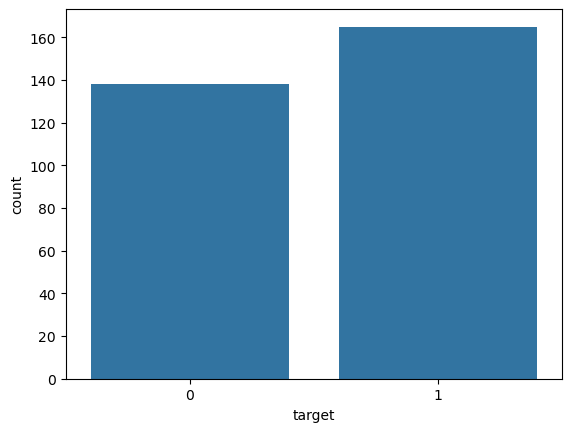

In [11]:
sns.countplot(x='target',data=df)

<Axes: >

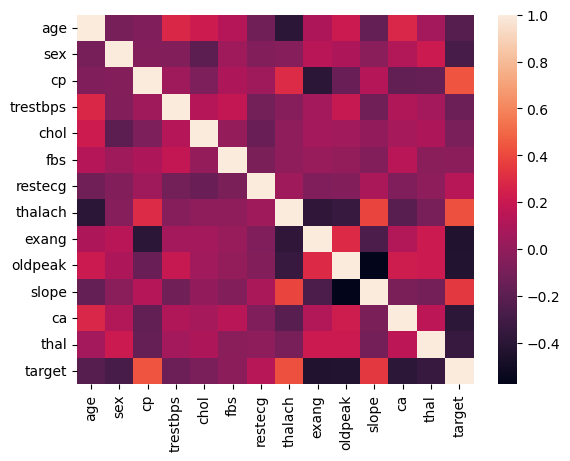

In [12]:
sns.heatmap(df.corr())

In [13]:
df.corr()['target'].sort_values()

exang      -0.436757
oldpeak    -0.430696
ca         -0.391724
thal       -0.344029
sex        -0.280937
age        -0.225439
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
slope       0.345877
thalach     0.421741
cp          0.433798
target      1.000000
Name: target, dtype: float64

<Axes: >

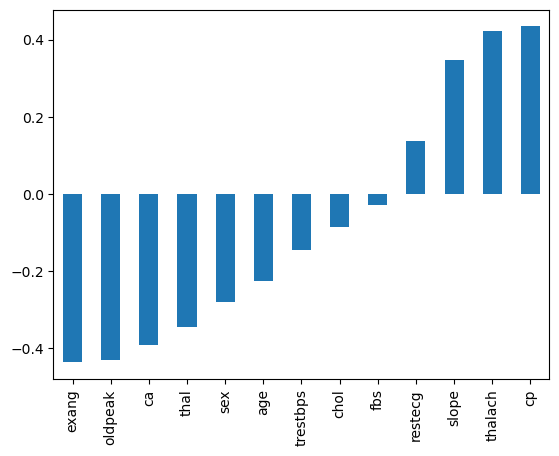

In [14]:
df.corr()['target'][:-1].sort_values().plot(kind='bar')

<Axes: xlabel='target', ylabel='cp'>

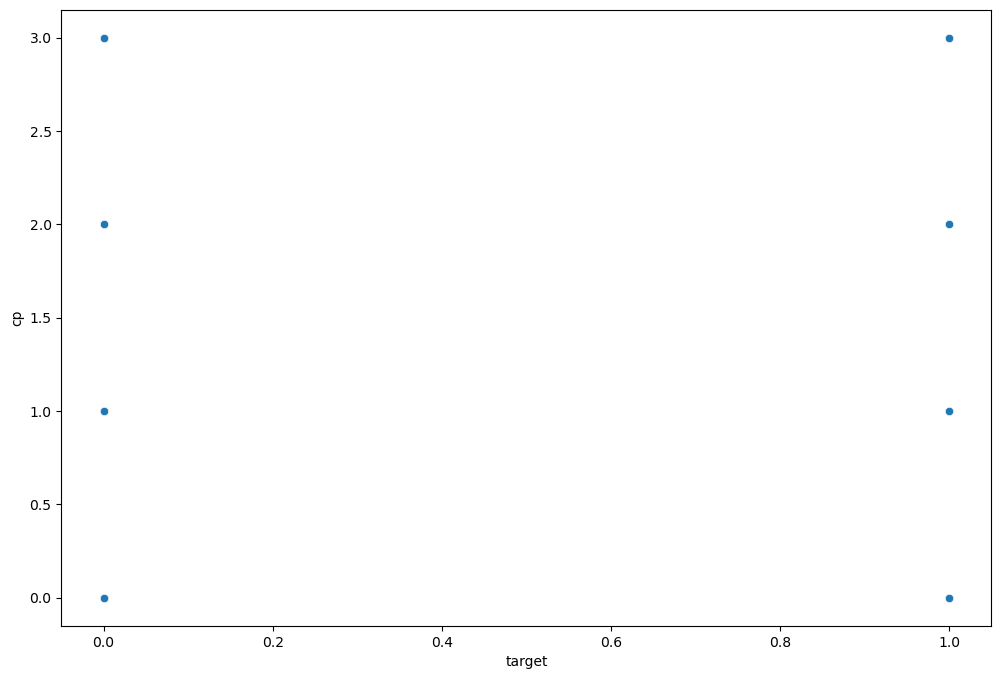

In [16]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='target',y='cp',data=df)

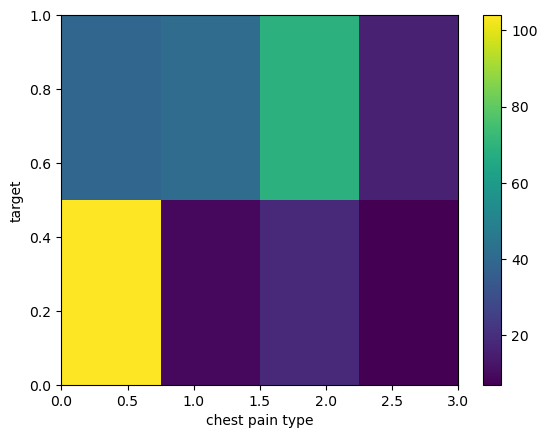

In [17]:
plt.hist2d(df["cp"],df["target"],bins=(4,2),cmap=plt.cm.viridis)
plt.xlabel('chest pain type')
plt.ylabel('target')
plt.colorbar()

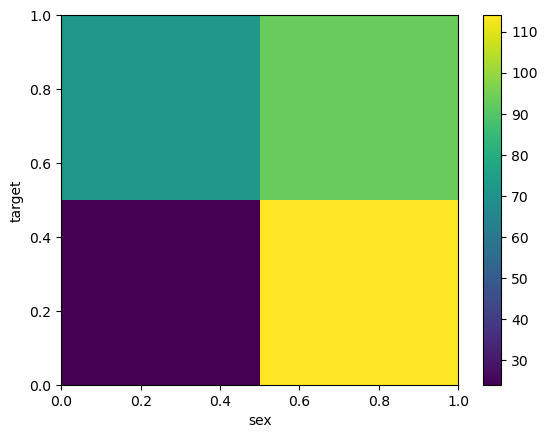

In [18]:
plt.hist2d(df["sex"],df["target"],bins=(2,2),cmap=plt.cm.viridis)
plt.xlabel('sex')
plt.ylabel('target')
plt.colorbar()

In [19]:
df.corr()['target'].sort_values()

exang      -0.436757
oldpeak    -0.430696
ca         -0.391724
thal       -0.344029
sex        -0.280937
age        -0.225439
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
slope       0.345877
thalach     0.421741
cp          0.433798
target      1.000000
Name: target, dtype: float64

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
X = df.drop('target',axis=1).values
y = df['target'].values

In [27]:
X.shape

(303, 13)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler = MinMaxScaler()

In [28]:
X_train.shape

(227, 13)

In [29]:
X_test.shape

(76, 13)

In [30]:
scaler.fit(X_train)

MinMaxScaler()

In [31]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
X_train.max()

1.0

In [33]:
X_train

array([[0.79166667, 1.        , 0.        , ..., 0.5       , 0.        ,
        0.66666667],
       [0.70833333, 1.        , 0.        , ..., 1.        , 0.75      ,
        1.        ],
       [0.29166667, 1.        , 0.        , ..., 1.        , 0.        ,
        0.66666667],
       ...,
       [0.35416667, 1.        , 0.33333333, ..., 1.        , 0.        ,
        1.        ],
       [0.25      , 1.        , 0.33333333, ..., 0.5       , 0.        ,
        0.33333333],
       [0.39583333, 0.        , 0.66666667, ..., 1.        , 0.        ,
        0.66666667]])

In [34]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [35]:
X_train.shape

(227, 13)

In [38]:
model = Sequential()
num_neurons = X_train.shape[1]
model.add(Dense(units=num_neurons, activation='relu'))
model.add(Dense(units=np.round(num_neurons/2).astype(int), activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [40]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test), verbose=1)

Epoch 1/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.6856 - val_loss: 0.6804
Epoch 2/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6815 - val_loss: 0.6745
Epoch 3/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6781 - val_loss: 0.6668
Epoch 4/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6676 - val_loss: 0.6563
Epoch 5/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6579 - val_loss: 0.6442
Epoch 6/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6454 - val_loss: 0.6303
Epoch 7/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6364 - val_loss: 0.6127
Epoch 8/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6174 - val_loss: 0.5929
Epoch 9/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6023 - val_loss: 0.5745
Epoch 10/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5860 - val_loss: 0.5556
Epoch 11/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.5699 - val_loss: 0.5408
Epoch 12/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5659 - val_loss: 0

In [41]:
model_loss = pd.DataFrame(model.history.history)

<Axes: >

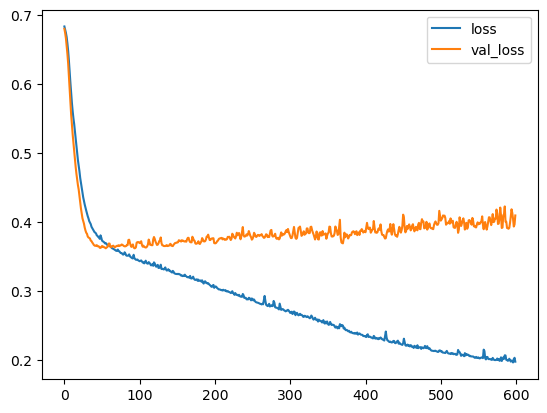

In [42]:
model_loss.plot() #This is overfitting

In [43]:
model = Sequential()
num_neurons = X_train.shape[1]
model.add(Dense(units=num_neurons, activation='relu'))
model.add(Dense(units=np.round(num_neurons/2).astype(int), activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [44]:
from tensorflow.keras.callbacks import EarlyStopping

In [46]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1, patience=25) #EarlyStopping technique 

In [47]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test), verbose=1, callbacks=[early_stop])

Epoch 1/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.8037 - val_loss: 0.8530
Epoch 2/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7581 - val_loss: 0.8115
Epoch 3/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.7423 - val_loss: 0.7838
Epoch 4/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.7159 - val_loss: 0.7614
Epoch 5/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.7030 - val_loss: 0.7421
Epoch 6/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6839 - val_loss: 0.7271
Epoch 7/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6889 - val_loss: 0.7150
Epoch 8/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6802 - val_loss: 0.7027
Epoch 9/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6687 - val_loss: 0.6911
Epoch 10/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6461 - val_loss: 0.6794
Epoch 11/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6482 - val_loss: 0.6696
Epoch 12/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6469 - val_loss: 0.

<Axes: >

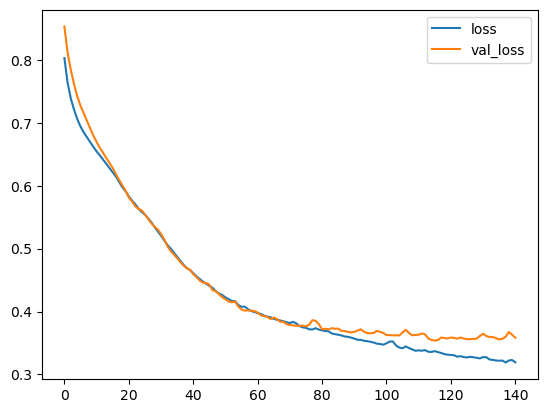

In [48]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [49]:
from tensorflow.keras.layers import Dropout

In [51]:
model = Sequential()
num_neurons = X_train.shape[1]
model.add(Dense(units=num_neurons, activation='relu'))
model.add(Dropout(0.5)) # Randomly deactivates 50% of neurons in the layer to reduce overfitting and improve model generalization.
model.add(Dense(units=np.round(num_neurons/2).astype(int), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [52]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test), verbose=1, callbacks=[early_stop])

Epoch 1/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.7963 - val_loss: 0.6514
Epoch 2/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.8319 - val_loss: 0.6454
Epoch 3/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7867 - val_loss: 0.6412
Epoch 4/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.8776 - val_loss: 0.6388
Epoch 5/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7943 - val_loss: 0.6372
Epoch 6/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7699 - val_loss: 0.6357
Epoch 7/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6983 - val_loss: 0.6331
Epoch 8/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7099 - val_loss: 0.6306
Epoch 9/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.7085 - val_loss: 0.6284
Epoch 10/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6964 - val_loss: 0.6270
Epoch 11/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.7048 - val_loss: 0.6255
Epoch 12/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7021 - val_loss: 0.623

<Axes: >

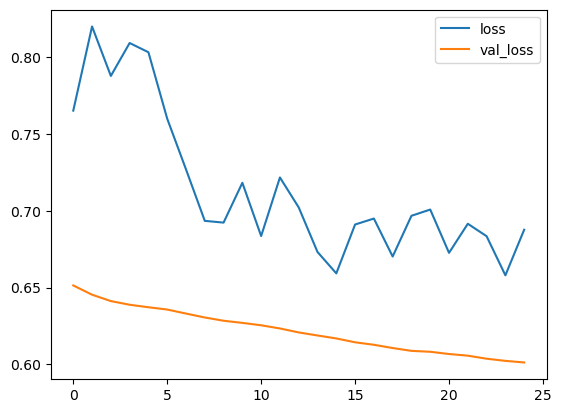

In [53]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [54]:
from sklearn.metrics import classification_report,confusion_matrix

In [58]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [59]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.70      0.76        37
           1       0.76      0.87      0.81        39

    accuracy                           0.79        76
   macro avg       0.80      0.79      0.79        76
weighted avg       0.80      0.79      0.79        76



In [60]:
print(confusion_matrix(y_test,predictions))

[[26 11]
 [ 5 34]]


In [62]:
df_pred = pd.read_excel('Heart_Diagnosis.xlsx', sheet_name='Datos_Predecir')
df_pred = df_pred[df.columns]
X_pred = df_pred.drop('target',axis=1)
X_pred = scaler.transform(X_pred)
resultado = model.predict(X_pred)
df_pred['PREDICTION']=pd.DataFrame(resultado)
df_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


C:\Users\MaríaQueraltSosaMomp\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,PREDICTION
0,60,1,3,145,233,1,0,150,0,2.3,0,0,1,NaN,0.540409
1,42,1,2,130,250,0,1,187,0,3.5,0,0,2,NaN,0.536352
2,40,0,1,130,204,0,0,172,0,1.4,2,0,2,NaN,0.583693
3,55,1,1,120,236,0,1,178,0,0.8,2,0,2,NaN,0.580021
4,62,0,0,120,354,0,1,163,1,0.6,2,0,2,NaN,0.490812
5,58,1,0,140,192,0,1,148,0,0.4,1,0,1,NaN,0.551567
6,55,0,1,140,294,0,0,153,0,1.3,1,0,2,NaN,0.602185
7,34,1,1,120,263,0,1,173,0,0.0,2,0,3,NaN,0.578025
8,50,1,2,172,199,1,1,162,0,0.5,2,0,3,NaN,0.582267
9,59,1,2,150,168,0,1,174,0,1.6,2,0,2,NaN,0.578436


In [64]:
from tensorflow.keras.models import load_model
model.save('Pred_Model_Heart.keras', include_optimizer=False)

In [65]:
loaded_model = load_model('Pred_Model_Heart.keras')